In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 11.4 MB/s 


In [2]:
import pandas as pd
from fbprophet import Prophet
import pyupbit

In [3]:
df = pyupbit.get_ohlcv("KRW-XRP", interval="minute1")

df = df.drop(["open", "high", "low", "volume", "value"], axis=1)

df = df.reset_index().rename(columns={"index": "ds"})
df = df.rename(columns={"close": "y"})
print(df)


                     ds       y
0   2021-08-23 14:58:00  1445.0
1   2021-08-23 14:59:00  1445.0
2   2021-08-23 15:00:00  1450.0
3   2021-08-23 15:01:00  1450.0
4   2021-08-23 15:02:00  1445.0
..                  ...     ...
195 2021-08-23 18:13:00  1490.0
196 2021-08-23 18:14:00  1495.0
197 2021-08-23 18:15:00  1495.0
198 2021-08-23 18:16:00  1495.0
199 2021-08-23 18:17:00  1495.0

[200 rows x 2 columns]


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                     ds         yhat   yhat_lower   yhat_upper
0   2021-08-23 14:58:00  1447.105562  1442.490473  1451.547097
1   2021-08-23 14:59:00  1447.005464  1442.561545  1451.217429
2   2021-08-23 15:00:00  1446.905367  1442.385498  1451.267268
3   2021-08-23 15:01:00  1446.805269  1442.323672  1451.080993
4   2021-08-23 15:02:00  1446.705172  1442.369098  1451.087630
..                  ...          ...          ...          ...
255 2021-08-23 19:13:00  1472.972894  1405.749794  1542.698445
256 2021-08-23 19:14:00  1472.592544  1401.453594  1544.691583
257 2021-08-23 19:15:00  1472.212194  1400.737065  1544.988889
258 2021-08-23 19:16:00  1471.831844  1398.978450  1547.020102
259 2021-08-23 19:17:00  1471.451494  1398.337559  1547.664536

[260 rows x 4 columns]


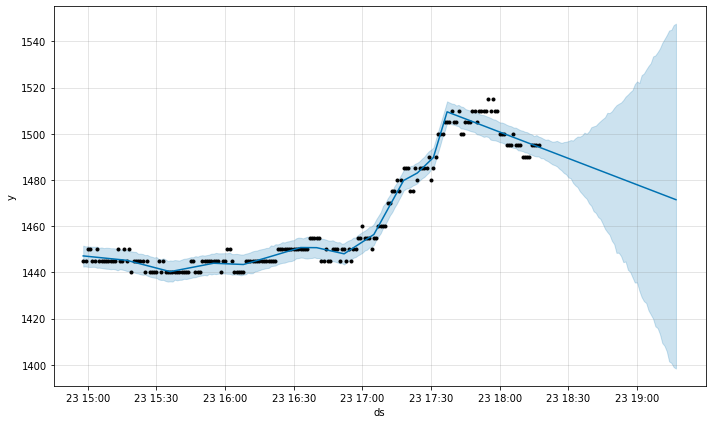

In [4]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=60, freq='min')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
fig1 = model.plot(forecast)